## 4.9 Data Visualization

### This script will contain the following:

#### Import Libraries
#### Import New Merged Dataframe
#### Visualizations
#### Hour of Day Visualization
#### Loyalty Bar Chart
#### Line Chart for Prices by Hour of Day
#### Line Chart for Customers Demographics
#### Scatterplot for Age/Income
#### Export All Visualizations

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import New Merged Dataframe

In [2]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/05-2023 Instacart Basket Analysis'

In [3]:
# Import Orders Products Customers Dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged_4_9_part_1.pkl'))

In [4]:
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequent_user_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,marriage_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_prior_order',
       'frequent_user_flag', 'First Name', 'Last Name', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'marriage_status', 'income'],
      dtype='object')

In [6]:
ords_prods_cust.isnull().sum()

product_id                             0
product_name                           0
aisle_id                               0
department_id                          0
prices                                 0
order_id                               0
user_id                                0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           2075740
add_to_cart_order                      0
reordered                              0
_merge                                 0
busiest_day                            0
price_range_loc                        0
busiest_days                           0
busiest_hours                          0
busiest_period_of_day                  0
max_order                              0
loyalty_flag                           0
mean_prices                            0
spending_flag                          0
median_days_since_prior_order          0
frequent_user_fl

# 03. Visualizations

## Bar Chart

<Axes: >

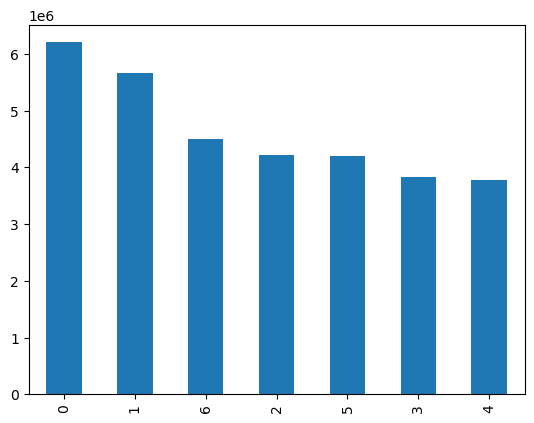

In [7]:
# Creating a Bar Chart for 'orders_day_of_week' column
ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

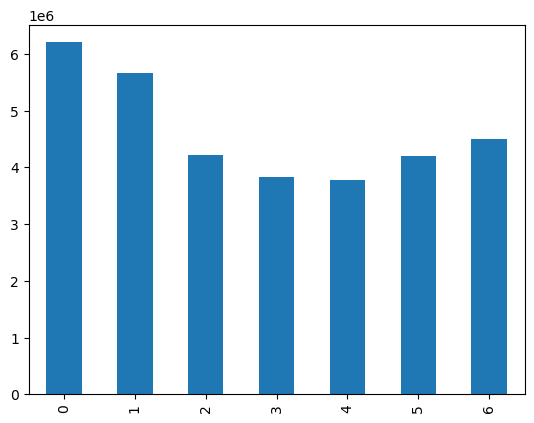

In [8]:
bar = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

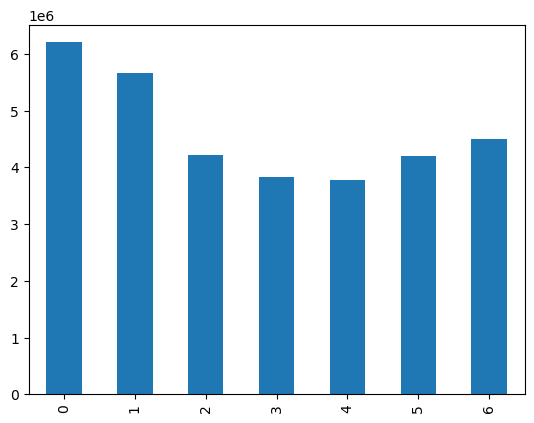

In [9]:
bar.figure

In [10]:
# Export Chart as Image
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_of_week2.png'))

## Histogram

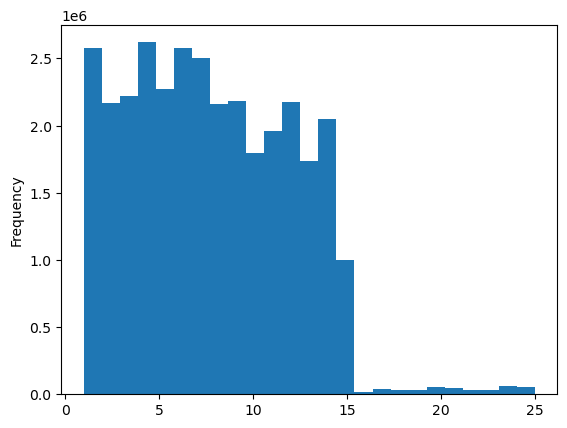

In [11]:
# Create a histogram for the 'prices' column
hist = ords_prods_cust['prices'].plot.hist(bins = 25)

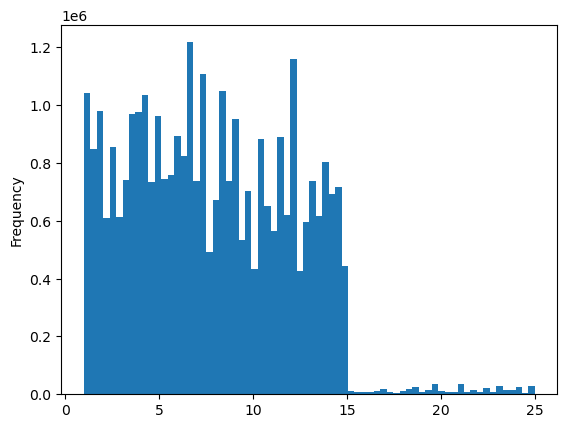

In [12]:
# Change the histogram to bins = 70
hist = ords_prods_cust['prices'].plot.hist(bins = 70)

In [13]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices2.png'))

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

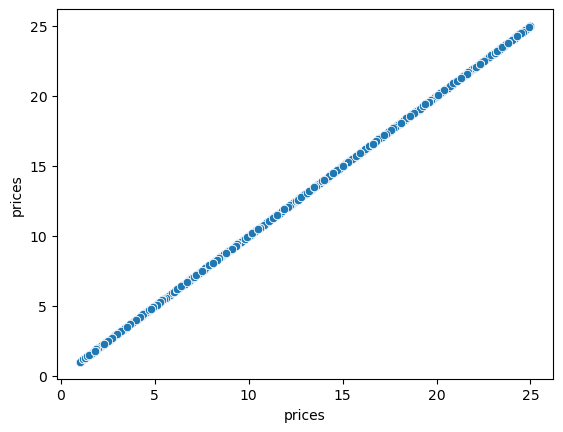

In [14]:
# Create a scatterplot for 'prices' column
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

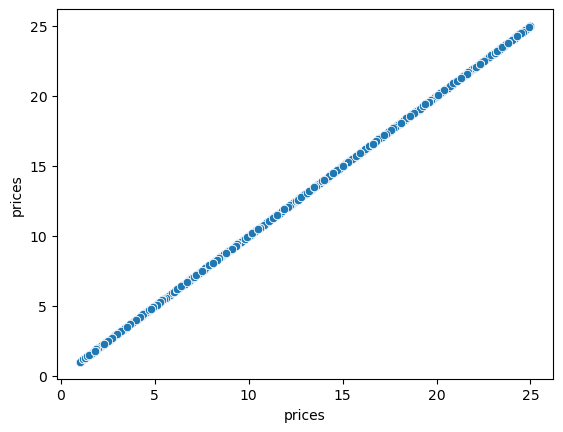

In [15]:
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

In [16]:
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices2.png'))

## Line Chart

### Create a Sample

In [17]:
np.random.seed(4)

In [18]:
# Create a List of True/False Values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True, False,  True])

In [20]:
# Store 70% of the Sample in the Dataframe big
big = ords_prods_cust[dev]

In [21]:
# Store 30% of the Sample in the Dataframe small
small = ords_prods_cust[~dev]

In [22]:
len(ords_prods_cust)

32399727

In [23]:
len(big) + len(small)

32399727

In [24]:
df_2 = small[['orders_day_of_week', 'prices']]

In [25]:
df_2

,orders_day_of_week,prices
0,6,5.8
2,5,20.0
3,5,20.0
6,5,4.4
10,0,12.8
...,...,...
32404839,1,1.8
32404841,1,1.8
32404847,1,1.8
32404849,3,1.8


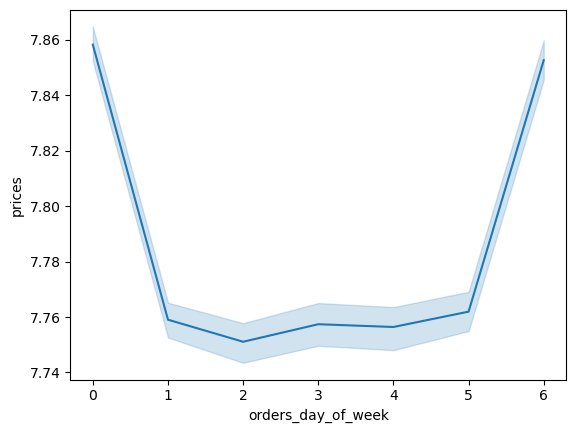

In [26]:
# Create Chart Using Sample
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
# Export Line Chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_day_of_week2.png'))

# Hour of Day Visualization

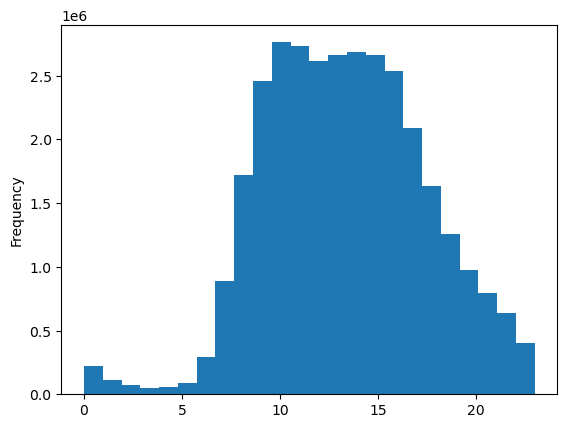

In [28]:
# Create a histogram for 'order_hour_of_day' column
hist_hour_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

### This histogram shows that early in the day (until 6:00) there are very few orders placed. The peak part of the day is from around 9:00 until 16:00. Orders decrease as the day goes on after 16:00.

In [29]:
# Export histogram
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day2.png'))

# Loyalty Bar Chart

In [30]:
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_prior_order',
       'frequent_user_flag', 'First Name', 'Last Name', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'marriage_status', 'income'],
      dtype='object')

<Axes: >

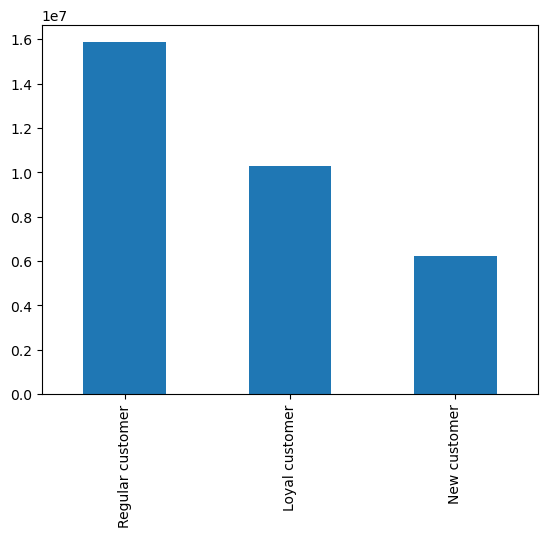

In [31]:
# Create a bar chart for the loyalty flag
ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

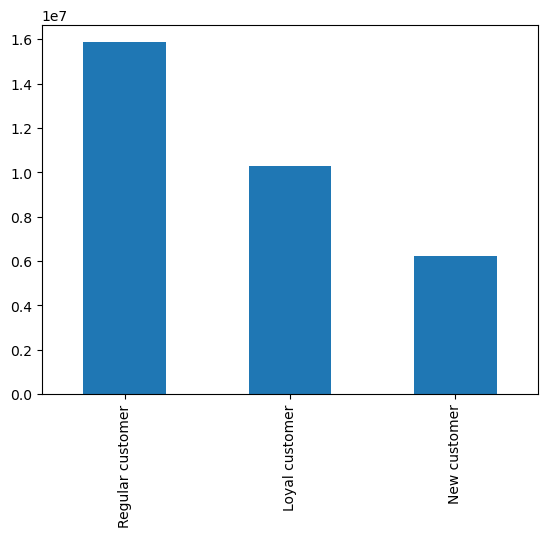

In [32]:
chart_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [33]:
# Export bar chart
chart_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'chart_loyalty2.png'))

# Line Chart for Prices by Hour of Day

In [34]:
df_3 = small[['order_hour_of_day', 'prices']]

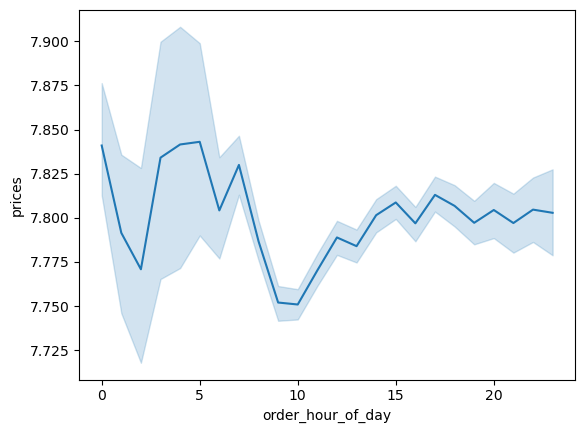

In [35]:
# Create a line chart for prices by hour of day
line_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [36]:
# Export Chart
line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices2.png'))

# Line Chart for Customer Demographics

In [37]:
df_4 = small[['Age', 'n_dependants']]

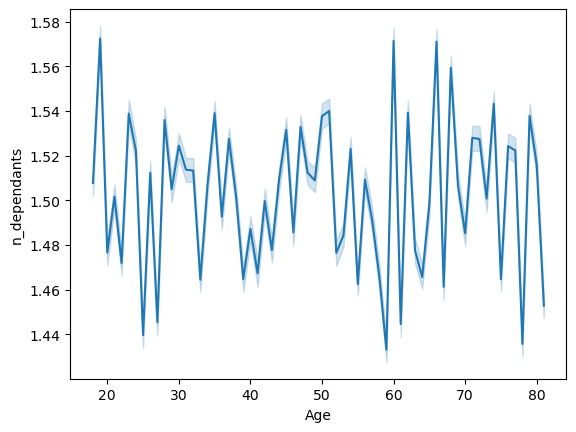

In [38]:
# Create a line chart for dependents by age
line_dependents = sns.lineplot(data = df_4, x = 'Age', y = 'n_dependants')

### This line chart tells us that there is little correlation between age and number of dependents. However, the age with the least dependents is about 59 and 78, and the age with the most is about 60.

In [39]:
# Export chart
line_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents2.png'))

# Scatterplot for Age/Income

<Axes: xlabel='Age', ylabel='income'>

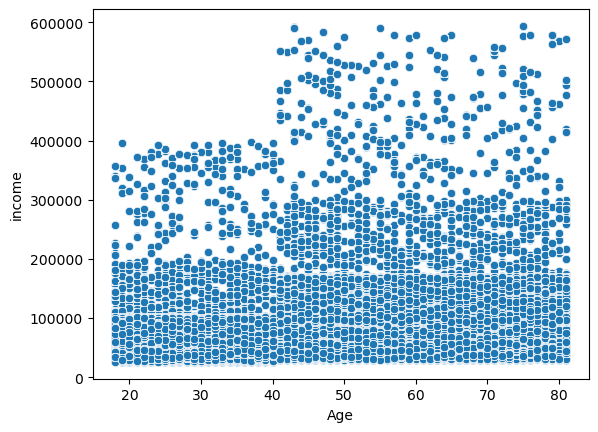

In [40]:
# Create a scatterplot for age and income
sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)

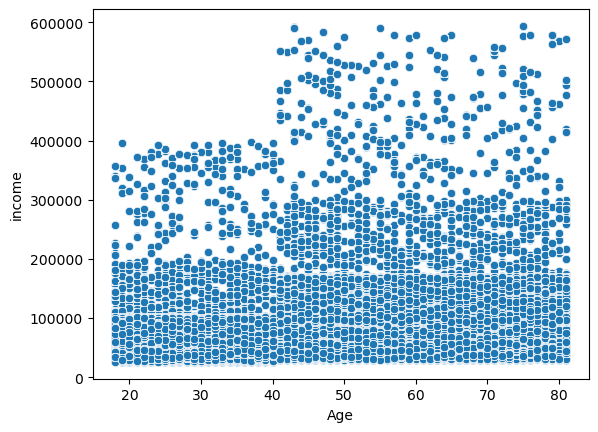

In [41]:
scatter_income = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)

### This scatterplot shows that there is little to no correlation between Age and income.

In [42]:
# Export scatterplot
scatter_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income2.png'))